### EDA & Visualization
For this Notebook runs an analysis/visualization on the Metro LA bikeshare data. I will be looking at 2019 Q2 data only to create Folium Map.  

In [1]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import folium

In [2]:
# 2017 data
df_2017_q1 = pd.read_csv('Data/la_metro_gbfs_trips_Q1_2017.csv')
df_2017_q2 = pd.read_csv('Data/la_metro_gbfs_trips_Q2_2017.csv')
df_2017_q3 = pd.read_csv('Data/metro-bike-share-trips-2017-q3.csv')
df_2017_q4 = pd.read_csv('Data/metro-bike-share-trips-2017-q4-v2.csv')
# 2018 data
df_2018_q1 = pd.read_csv('Data/metro-bike-share-trips-2018-q1.csv')
df_2018_q2 = pd.read_csv('Data/metro-bike-share-trips-2018-q2.csv')
df_2018_q3 = pd.read_csv('Data/metro-bike-share-trips-2018-q3.csv')
df_2018_q4 = pd.read_csv('Data/metro-bike-share-trips-2018-q4.csv')
# 2019 data
df_2019_q1 = pd.read_csv('Data/metro-bike-share-trips-2019-q1.csv')
df_2019_q2 = pd.read_csv('Data/metro-bike-share-trips-2019-q2.csv')
#  = pd.read_csv('Data/metro-bike-share-stations-2019-07-01.csv') # station_df

## Take 2019 q2 data only to draw folium map

In [3]:
df = df_2019_q2
# df = pd.concat([df_2019_q1, df_2019_q2])
# df = pd.concat([df_2017_q1, df_2017_q2, df_2017_q3, df_2017_q4 ,df_2018_q1, df_2018_q2, df_2018_q3, df_2018_q4, df_2019_q1, df_2019_q2])
# df = pd.concat([df_2018_q1, df_2018_q2, df_2018_q3, df_2018_q4, df_2019_q1, df_2019_q2])
print(df.shape)

(64545, 15)


In [4]:
df.head()

,trip_id,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,bike_type
0,118571839,7,2019-04-01 00:02:00,2019-04-01 00:09:00,3069,34.050880,-118.248253,3034,34.042061,-118.263382,6459,1,One Way,Walk-up,standard
1,118574695,12,2019-04-01 00:56:00,2019-04-01 01:08:00,3031,34.044701,-118.252441,4311,34.059689,-118.294662,12229,30,One Way,Monthly Pass,standard
2,118575167,12,2019-04-01 01:06:00,2019-04-01 01:18:00,3038,34.046822,-118.248352,3082,34.046520,-118.237411,6422,1,One Way,Walk-up,standard
3,118577060,48,2019-04-01 01:08:00,2019-04-01 01:56:00,3068,34.053200,-118.250954,3005,34.048500,-118.258537,12211,30,One Way,Monthly Pass,standard
4,118575166,9,2019-04-01 01:09:00,2019-04-01 01:18:00,3038,34.046822,-118.248352,3082,34.046520,-118.237411,12005,1,One Way,Walk-up,standard


### Drop NA and create 'date' feature from 'start_time'. 
### Create features of weekday, hour, and minute from Date.

In [5]:
df.dropna(inplace=True)

In [6]:
df['Date'] = pd.DatetimeIndex(df['start_time'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61378 entries, 0 to 64544
Data columns (total 16 columns):
trip_id                61378 non-null int64
duration               61378 non-null int64
start_time             61378 non-null object
end_time               61378 non-null object
start_station          61378 non-null int64
start_lat              61378 non-null float64
start_lon              61378 non-null float64
end_station            61378 non-null int64
end_lat                61378 non-null float64
end_lon                61378 non-null float64
bike_id                61378 non-null int64
plan_duration          61378 non-null int64
trip_route_category    61378 non-null object
passholder_type        61378 non-null object
bike_type              61378 non-null object
Date                   61378 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(6), object(5)
memory usage: 8.0+ MB


In [7]:
df['dayName'] = pd.DatetimeIndex(df['start_time']).weekday
df['hour'] = pd.DatetimeIndex(df['start_time']).hour
df['minute'] = pd.DatetimeIndex(df['start_time']).minute

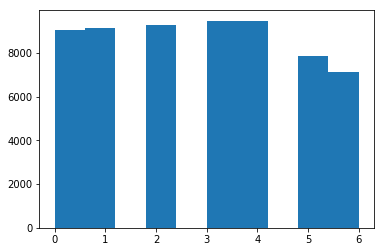

In [8]:
plt.hist(df.dayName);

In [9]:
df['dayName'].value_counts()

3    9475
4    9447
2    9288
1    9120
0    9062
5    7879
6    7107
Name: dayName, dtype: int64

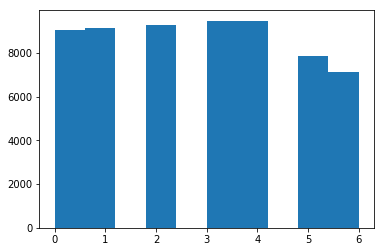

In [10]:
plt.hist(df['dayName'], histtype='bar');

Separate df into weekdays. Plot line graph for each weekdays groupby 'hour' and count by 'dayName'

In [11]:
mon_df = df.loc[df['dayName']==0]
tue_df = df.loc[df['dayName']==1]
wed_df = df.loc[df['dayName']==2]
thur_df = df.loc[df['dayName']==3]
fri_df = df.loc[df['dayName']==4]
sat_df = df.loc[df['dayName']==5]
sun_df = df.loc[df['dayName']==6]

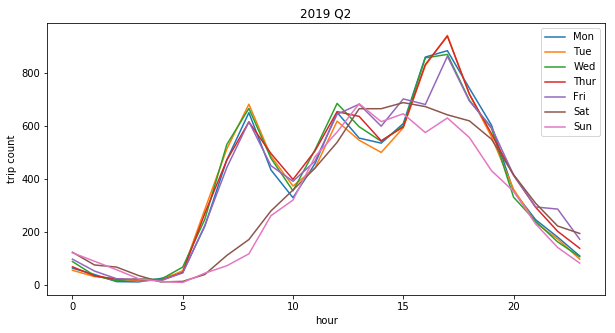

In [12]:
mon_df.groupby(['hour'])['dayName'].count().plot.line(figsize = (10, 5), label='Mon')
tue_df.groupby(['hour'])['dayName'].count().plot.line(figsize = (10, 5), label='Tue')
wed_df.groupby(['hour'])['dayName'].count().plot.line(figsize = (10, 5), label='Wed')
thur_df.groupby(['hour'])['dayName'].count().plot.line(figsize = (10, 5), label='Thur')
fri_df.groupby(['hour'])['dayName'].count().plot.line(figsize = (10, 5), label='Fri')
sat_df.groupby(['hour'])['dayName'].count().plot.line(figsize = (10, 5), label='Sat')
sun_df.groupby(['hour'])['dayName'].count().plot.line(figsize = (10, 5), label='Sun')

plt.ylabel('trip count')
plt.title('2019 Q2')
plt.legend();

Each station must have its own temporal profile, a characteristic time-series that says something about how and when that station is used.  If a station peaks early in the weekday morning and then never again, it could mean that this stations primary purpose is transporting people to work. Likewise if a station peaks at 6pm but never again then it could be considered an evening commute station. Other patterns might also exists that lend themselves to easy interpretation.

- Most of the trips start after work hours (between 17.00 and 19.00)
- Lunch time is also active (between 12.00 and 14.00)
- Trip again peaks at 6pm considering an evening commute.   
- It seems everybody sleeps after midnight, between 00.00 and 07.00 is the least active time.

## Get the station name using Station Information data. 

In [13]:
stations_df = pd.read_csv('Data/metro-bike-share-stations-2019-07-01.csv')
stations_df.head()

,Station_ID,Station_Name,Go_live_date,Region,Status
0,3000,Virtual Station,7/7/2016,NaN,Active
1,3005,7th & Flower,7/7/2016,Central LA,Active
2,3006,Olive & 8th,7/7/2016,Central LA,Active
3,3007,5th & Grand,7/7/2016,Central LA,Active
4,3008,Figueroa & 9th,7/7/2016,Central LA,Active


In [14]:
stations_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 5 columns):
Station_ID      206 non-null int64
Station_Name    206 non-null object
Go_live_date    206 non-null object
Region          205 non-null object
Status          206 non-null object
dtypes: int64(1), object(4)
memory usage: 8.1+ KB


## Drop NANs in stations_df and merge it into df.

In [15]:
stations_df = stations_df.loc[~stations_df['Region '].isna()]

In [16]:
# rename start_station onto 'Station_ID' to match and merge with Station Info Data.
df = df.rename(columns={'start_station': 'Station_ID'})
# rename features to merge them 
merged_df = df.merge(stations_df, how='left', on='Station_ID')
merged_df = merged_df.rename(columns={'Station_ID': 'starting_station_id',
                                     'Station_Name': 'station_name_start',
                                     'Region ': 'region_start'})

merged_df = merged_df.rename(columns={'end_station': 'Station_ID'})
merged_df = merged_df.merge(stations_df, on='Station_ID', how='left')
merged_df = merged_df.rename(columns={'Station_ID': 'ending_station_id',
                                     'Station_Name': 'station_name_end',
                                     'Region ': 'region_end'})

In [17]:
print(merged_df.shape)
merged_df.columns

(61378, 27)


Index(['trip_id', 'duration', 'start_time', 'end_time', 'starting_station_id',
       'start_lat', 'start_lon', 'ending_station_id', 'end_lat', 'end_lon',
       'bike_id', 'plan_duration', 'trip_route_category', 'passholder_type',
       'bike_type', 'Date', 'dayName', 'hour', 'minute', 'station_name_start',
       'Go_live_date_x', 'region_start', 'Status_x', 'station_name_end',
       'Go_live_date_y', 'region_end', 'Status_y'],
      dtype='object')

### Delete unnecessary features and create unique route based on trip start and trip end information.

In [18]:
del merged_df['Go_live_date_x'], merged_df['Go_live_date_y'], merged_df['Status_x'], merged_df['Status_y']

In [19]:
# Create route feature using starting station location and ending station location 
merged_df['route'] = merged_df.station_name_start + '-->' + merged_df.station_name_end

In [20]:
merged_df.head().T

,0,1,2,3,4
trip_id,118571839,118574695,118575167,118577060,118575166
duration,7,12,12,48,9
start_time,2019-04-01 00:02:00,2019-04-01 00:56:00,2019-04-01 01:06:00,2019-04-01 01:08:00,2019-04-01 01:09:00
end_time,2019-04-01 00:09:00,2019-04-01 01:08:00,2019-04-01 01:18:00,2019-04-01 01:56:00,2019-04-01 01:18:00
starting_station_id,3069,3031,3038,3068,3038
start_lat,34.0509,34.0447,34.0468,34.0532,34.0468
start_lon,-118.248,-118.252,-118.248,-118.251,-118.248
ending_station_id,3034,4311,3082,3005,3082
end_lat,34.0421,34.0597,34.0465,34.0485,34.0465
end_lon,-118.263,-118.295,-118.237,-118.259,-118.237


### Filter it out region into Central LA only 

In [21]:
print(merged_df.region_start.unique())
print(merged_df.shape)


['Central LA' 'Port of LA' 'Westside' nan]
(61378, 24)


In [22]:
merged_df = merged_df.loc[~merged_df['region_start'].isna()]

In [23]:
merged_df = merged_df.loc[merged_df['region_start'] == 'Central LA']

## Station trip volume analysis

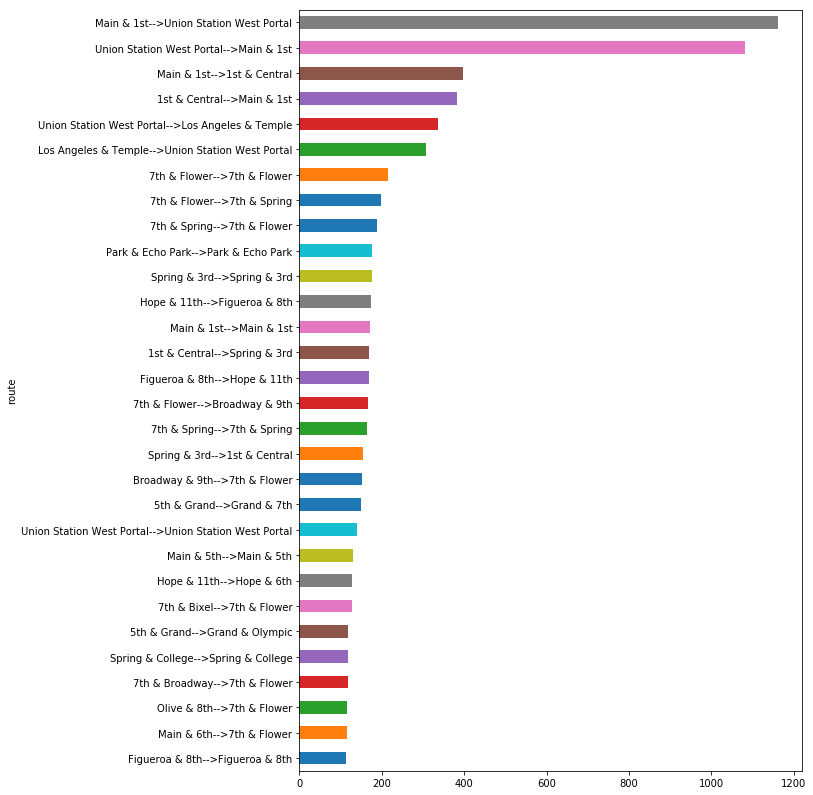

In [24]:
merged_df.groupby(['route'])['trip_id'].count().sort_values()[-30:].plot.barh(figsize = (9, 14));

- “Main & 1st → Union Station West Portal” and other way of route have most trip count
- Looking only top 60 Bike Stations

In [25]:
merged_df.route.nunique()

4155

## Station & top routes into account both directions for every route
- Groupby route
- Merge data for the routes, taking into account both directions
- Sum the trips count if it has two directions
- Filter only those with a certain volume

In [26]:
# groupby route
route_cnt = pd.DataFrame(merged_df.groupby(['station_name_start', 'station_name_end', 'route'])['trip_id'].count()).reset_index()
route_cnt_swap = route_cnt.rename(columns = {'station_name_start': 'station_name_end',
                                             'station_name_end': 'station_name_start'})
route_cnt_swap.head()

,station_name_end,station_name_start,route,trip_id
0,11th & Maple,11th & Maple,11th & Maple-->11th & Maple,11
1,11th & Maple,12th & Hill,11th & Maple-->12th & Hill,1
2,11th & Maple,18th & San Pedro,11th & Maple-->18th & San Pedro,5
3,11th & Maple,1st & Central,11th & Maple-->1st & Central,6
4,11th & Maple,1st & Judge John Aiso,11th & Maple-->1st & Judge John Aiso,2


In [27]:
#merge data for the routes, taking into account both directions
route_cnt_all = route_cnt.merge(route_cnt_swap, on=['station_name_start', 'station_name_end'])
route_cnt_all.head()

,station_name_start,station_name_end,route_x,trip_id_x,route_y,trip_id_y
0,11th & Maple,11th & Maple,11th & Maple-->11th & Maple,11,11th & Maple-->11th & Maple,11
1,11th & Maple,12th & Hill,11th & Maple-->12th & Hill,1,12th & Hill-->11th & Maple,5
2,11th & Maple,18th & San Pedro,11th & Maple-->18th & San Pedro,5,18th & San Pedro-->11th & Maple,6
3,11th & Maple,1st & Central,11th & Maple-->1st & Central,6,1st & Central-->11th & Maple,1
4,11th & Maple,1st & Judge John Aiso,11th & Maple-->1st & Judge John Aiso,2,1st & Judge John Aiso-->11th & Maple,3


In [28]:
#sum the trips count if it has two directions (do not sum twice round trips)
route_cnt_all['route_count'] = route_cnt_all['trip_id_x']
update_idx = route_cnt_all.station_name_start != route_cnt_all.station_name_end
route_cnt_all.loc[update_idx, 'route_count'] = route_cnt_all[update_idx].trip_id_x + route_cnt_all[update_idx].trip_id_y 
route_cnt_all.head(5)

,station_name_start,station_name_end,route_x,trip_id_x,route_y,trip_id_y,route_count
0,11th & Maple,11th & Maple,11th & Maple-->11th & Maple,11,11th & Maple-->11th & Maple,11,11
1,11th & Maple,12th & Hill,11th & Maple-->12th & Hill,1,12th & Hill-->11th & Maple,5,6
2,11th & Maple,18th & San Pedro,11th & Maple-->18th & San Pedro,5,18th & San Pedro-->11th & Maple,6,11
3,11th & Maple,1st & Central,11th & Maple-->1st & Central,6,1st & Central-->11th & Maple,1,7
4,11th & Maple,1st & Judge John Aiso,11th & Maple-->1st & Judge John Aiso,2,1st & Judge John Aiso-->11th & Maple,3,5


In [29]:
route_cnt_all = route_cnt_all.rename(columns = {'route_x': 'route'})
routedf = merged_df.drop_duplicates(subset=['route'])
routedf = routedf.merge(route_cnt_all, on = 'route')
# filter route volume > 100
routedf_vol = routedf.loc[routedf.route_count > 100]

print(routedf_vol.shape)
routedf_vol.head(1)

(176, 30)


,trip_id,duration,start_time,end_time,starting_station_id,start_lat,start_lon,ending_station_id,end_lat,end_lon,...,region_start,station_name_end_x,region_end,route,station_name_start_y,station_name_end_y,trip_id_x,route_y,trip_id_y,route_count
4,118703308,1440,2019-04-01 01:11:00,2019-04-02 14:48:00,3027,34.04998,-118.247162,3027,34.04998,-118.247162,...,Central LA,Spring & 3rd,Central LA,Spring & 3rd-->Spring & 3rd,Spring & 3rd,Spring & 3rd,176,Spring & 3rd-->Spring & 3rd,176,176


# Geographical visualization: Folium Map
- Create base map
- Drop folium markers for each stations with names
- Draw a trip count line for every route
- Create Heatmap


In [30]:
# create base map
def get_base_map(df):
    return folium.Map(location=[df.start_lat.mean(),
                             df.start_lon.mean()],
                   zoom_start=14,
                   tiles='cartodbpositron')


#base map
base = get_base_map(merged_df)
base

In [31]:
# drop markers for each stations
def add_station_markers(initial_map, df):
    #station location visualization
    statdf = df.drop_duplicates(subset=['starting_station_id'])
    out_map = initial_map
    for lat, lon, name in zip(statdf['start_lat'], statdf['start_lon'], statdf['station_name_start']):
        out_map.add_child(folium.Marker(location=[lat,lon], popup=(folium.Popup(name))))
    return out_map

markers = add_station_markers(base, merged_df)
markers 

In [32]:
def draw_route_lines(initial_map, routedf_vol):
    out_map = initial_map
    #draw every route as a line
    for ix, row  in routedf_vol[['start_lat', 'start_lon', 'end_lat', 'end_lon', 'route_count']].iterrows():
        #draw a line for every route
        folium.PolyLine([(row['start_lat'], row['start_lon']),
                         (row['end_lat'], row['end_lon'])],
                         weight = row['route_count'] / 100,
                         opacity = float(row['route_count']) / routedf_vol['route_count'].mean(),
                         popup= str(int(row['route_count'])))\
              .add_to(out_map)
    return out_map

In [33]:
draw_route_lines(markers, routedf_vol)

In [34]:
from folium import plugins
# useful source for folium heatmap https://alysivji.github.io/getting-started-with-folium.html
# convert to (n, 2) nd-array format for heatmap
#limited to 40K obs, as with more than that it dies
stationArr = merged_df[['start_lat', 'start_lon']][:40000].values
# plot heatmap
# - get base map
# - then draw the actual HeatMap
get_base_map(merged_df).add_child(plugins.HeatMap(stationArr, radius=33, max_val=200, min_opacity=.3))

In [35]:
# add route lines
(draw_route_lines(get_base_map(merged_df), 
                  routedf_vol)).add_child(plugins.HeatMap(stationArr, radius=30, max_val=200))

# Heatmap with time animation
- Need to pass a list of times and inside of hours stations latitude, longitude, route_count.
- Generate base map
- Generate heatmap with time animation using folium.plugins
- Save heatmap time animation as heatmaptimes.html to display it onto Flask app page

In [36]:

df_hour_list = []
for hour in routedf_vol.hour.sort_values().unique():
    df_hour_list.append(
        routedf_vol.loc[routedf_vol.hour == hour, ['start_lat', 
                                            'start_lon', 
                                            'route_count']].groupby(['start_lat', 
                                                                     'start_lon']).sum().reset_index().values.tolist())


In [37]:
df_hour_list

[[[34.04998, -118.24716200000002, 176.0]],
 [[34.044701, -118.25244099999999, 134.0],
  [34.04554, -118.25666799999999, 213.0],
  [34.05661, -118.23721299999998, 642.0]],
 [[34.051102, -118.26455700000001, 171.0],
  [34.05661, -118.23721299999998, 2243.0]],
 [[34.04211, -118.25618700000001, 122.0],
  [34.044701, -118.25244099999999, 386.0],
  [34.04652, -118.23741100000001, 176.0],
  [34.049301, -118.238808, 323.0],
  [34.05661, -118.23721299999998, 243.0]],
 [[34.042061, -118.26338200000001, 128.0],
  [34.043732, -118.260139, 143.0],
  [34.044701, -118.25244099999999, 301.0],
  [34.045421999999995, -118.25351699999999, 184.0],
  [34.04652, -118.23741100000001, 302.0],
  [34.048038, -118.25373799999998, 107.0],
  [34.049301, -118.238808, 1029.0],
  [34.05088, -118.248253, 140.0],
  [34.051941, -118.24353, 123.0],
  [34.052898, -118.24156200000002, 123.0],
  [34.05661, -118.23721299999998, 250.0],
  [34.063179, -118.24588, 175.0]],
 [[34.038609, -118.260857, 112.0],
  [34.039982, -118.2

In [38]:
def gernerateBaseMap(default_location=[34.044701, -118.25244099999999], default_zoom_start=12):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map
#base map

In [39]:
from folium.plugins import HeatMapWithTime
base_map = gernerateBaseMap(default_zoom_start=14)
HeatMapWithTime(df_hour_list, radius=25, gradient={0.2: 'blue', 0.4: 'lime', 0.6: 'orange', 1: 'red'}, min_opacity=0.5, max_opacity=0.8, use_local_extrema=True).add_to(base_map)
base_map

Hourly Heatmap for bike stations based on trip start

In [ ]:
# can be uncomment to create heatmaptimes.html
# base_map.save('heatmaptimes.html')